Deep Learning Fundamentals - Assignment 1 - Predict Diabetes using Perceptron - Aman Sami - A1897314

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']

def load_preprocessed_data(file_path):
    outcomes = []
    features = []

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()  
            parts = line.split()  
            
            outcome = int(parts[0])
            outcomes.append(outcome)
            
            feature_values = [float(feature.split(':')[1]) for feature in parts[1:]]
            features.append(feature_values)

    X = np.array(features)  
    y = np.array(outcomes) 
    
    df = pd.DataFrame(X, columns=feature_names)
    df['Outcome'] = y 
    
    return df

file_path = 'diabetes.txt'
df = load_preprocessed_data(file_path)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.599998   
1          1.0     85.0           66.0           29.0      0.0  26.600000   
2          8.0    183.0           64.0            0.0      0.0  23.299999   
3          1.0     89.0           66.0           23.0     94.0  28.100000   
4          0.0    137.0           40.0           35.0    168.0  43.099998   

   DiabetesPedigree   Age  Outcome  
0             0.627  50.0       -1  
1             0.351  31.0        1  
2             0.672  32.0       -1  
3             0.167  21.0        1  
4             2.288  33.0       -1  


In [3]:
df['Outcome'] = df['Outcome'].replace({-1: 0, 1: 1})

print(df['Outcome'].value_counts())

Outcome
1    500
0    268
Name: count, dtype: int64


In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.599998   
1          1.0     85.0           66.0           29.0      0.0  26.600000   
2          8.0    183.0           64.0            0.0      0.0  23.299999   
3          1.0     89.0           66.0           23.0     94.0  28.100000   
4          0.0    137.0           40.0           35.0    168.0  43.099998   

   DiabetesPedigree   Age  Outcome  
0             0.627  50.0        0  
1             0.351  31.0        1  
2             0.672  32.0        0  
3             0.167  21.0        1  
4             2.288  33.0        0  


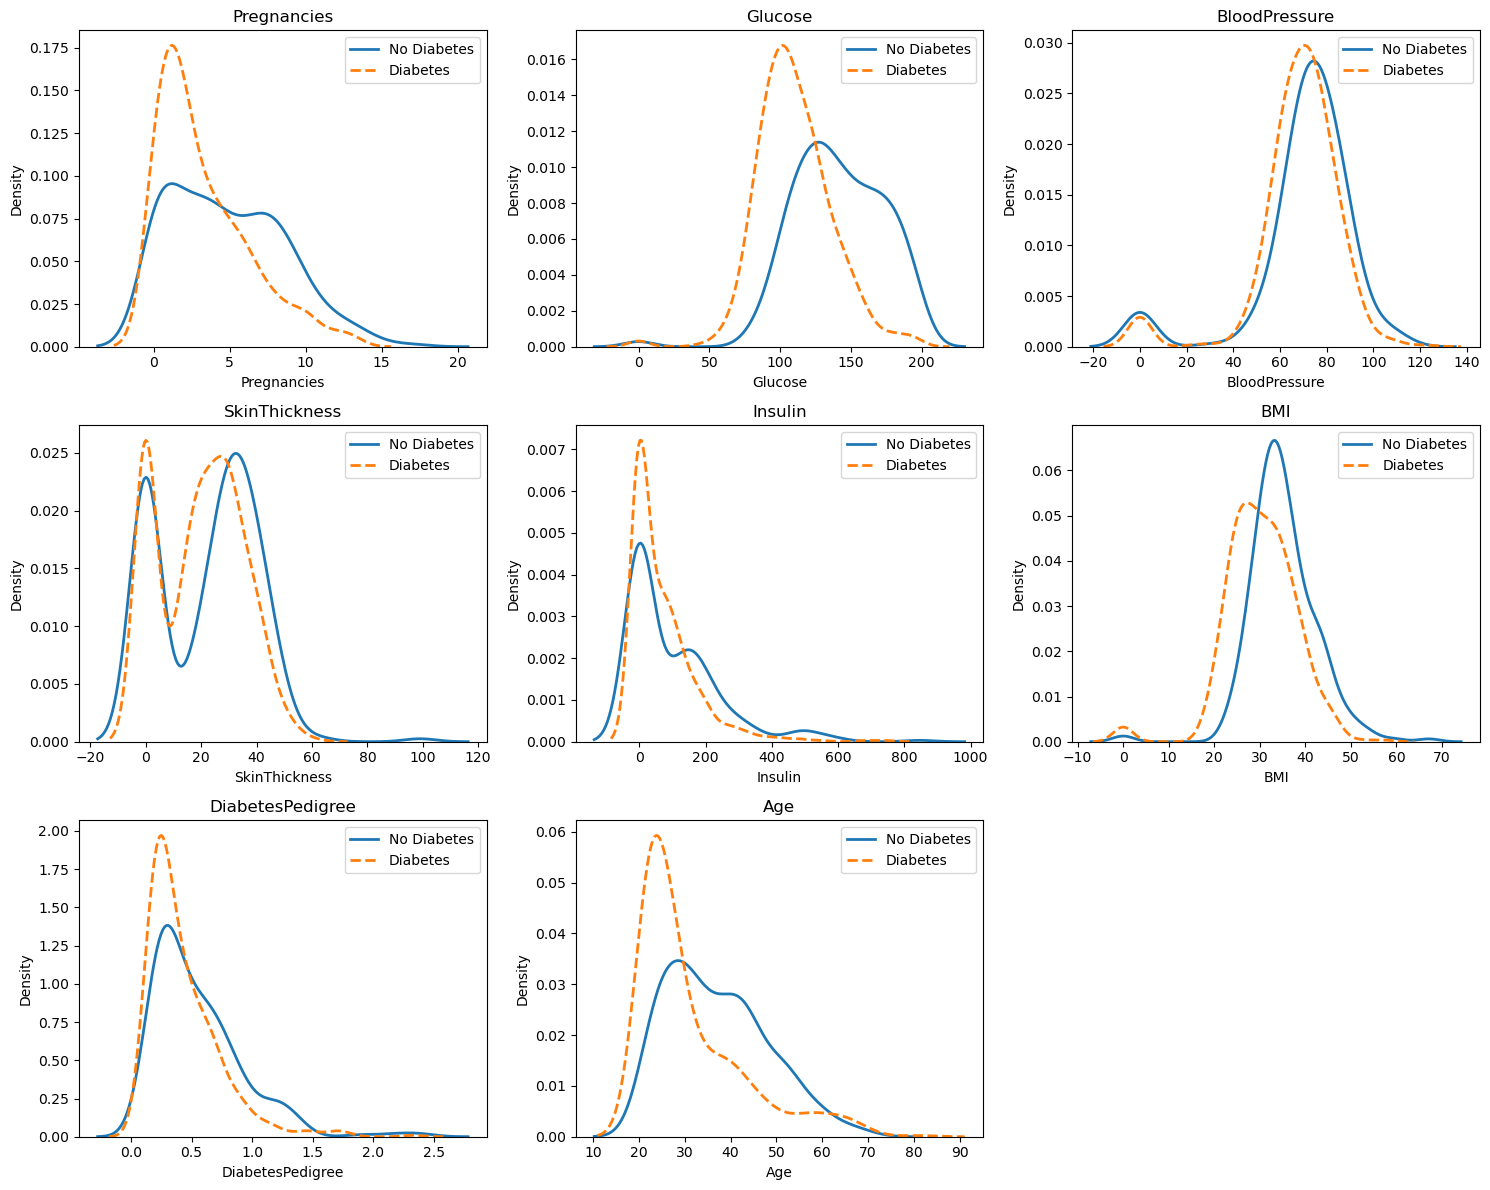

In [5]:
no_diabetes = df[df['Outcome'] == 0]
diabetes = df[df['Outcome'] == 1]

plt.figure(figsize=(15, 12))

for i, feature in enumerate(feature_names, 1): 
    plt.subplot(3, 3, i)  
    sns.kdeplot(no_diabetes[feature], label="No Diabetes", linestyle='-', lw=2)
    sns.kdeplot(diabetes[feature], label="Diabetes", linestyle='--', lw=2)
    plt.title(f'{feature}')  
    plt.legend()  
    plt.tight_layout()  

plt.show()

In [6]:
X = df[feature_names].values
y = df['Outcome'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42, stratify=y_train_val)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 307
Validation set size: 307
Test set size: 154


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
SingleLayer = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 25ms/step - loss: 1.2217 - accuracy: 0.3453 - val_loss: 1.1281 - val_accuracy: 0.4202
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 1.2056 - accuracy: 0.3518 - val_loss: 1.1149 - val_accuracy: 0.4235
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1900 - accuracy: 0.3550 - val_loss: 1.1015 - val_accuracy: 0.4267
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1742 - accuracy: 0.3550 - val_loss: 1.0883 - val_accuracy: 0.4365
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1595 - accuracy: 0.3550 - val_loss: 1.0749 - val_accuracy: 0.4397
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 1.1439 - accuracy: 0.3616 - val_loss: 1.0621 - val_accuracy: 0.4463
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 1.1286 - accuracy: 0.3648 - val_loss: 1.0498 - val_accuracy: 0.4463
Epoch 8/50
10/10 [=

10/10 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.6124
Train Accuracy: 0.6124
5/5 [==============================] - 0s 1ms/step - loss: 0.7326 - accuracy: 0.5974
Test Accuracy: 0.5974


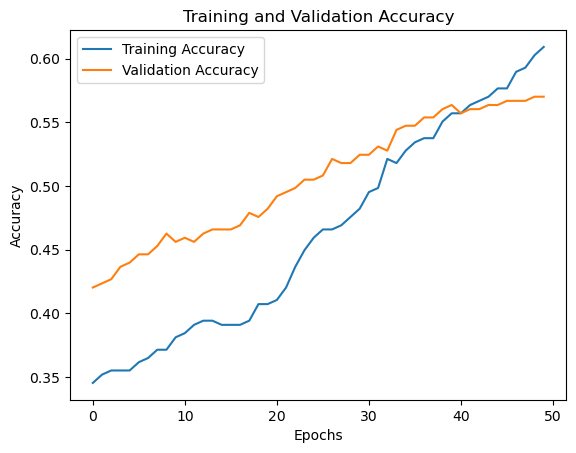

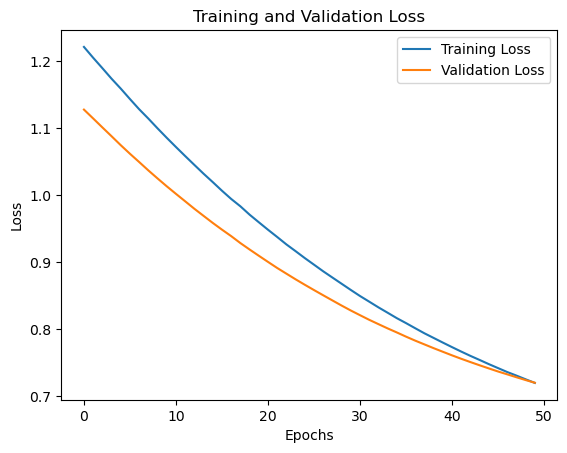

In [9]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_acc:.4f}")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(SingleLayer.history['accuracy'], label='Training Accuracy')
plt.plot(SingleLayer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(SingleLayer.history['loss'], label='Training Loss')
plt.plot(SingleLayer.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

HiddenLayer = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 31ms/step - loss: 0.6444 - accuracy: 0.6840 - val_loss: 0.6588 - val_accuracy: 0.6678
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.6906 - val_loss: 0.6421 - val_accuracy: 0.6710
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6005 - accuracy: 0.6971 - val_loss: 0.6273 - val_accuracy: 0.6873
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5806 - accuracy: 0.7036 - val_loss: 0.6155 - val_accuracy: 0.6808
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.7068 - val_loss: 0.6045 - val_accuracy: 0.6775
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5497 - accuracy: 0.7166 - val_loss: 0.5952 - val_accuracy: 0.6873
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5369 - accuracy: 0.7199 - val_loss: 0.5868 - val_accuracy: 0.6873
Epoch 8/50
10/10 [=

10/10 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8306
Train Accuracy: 0.8306
5/5 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7338
Test Accuracy: 0.7338


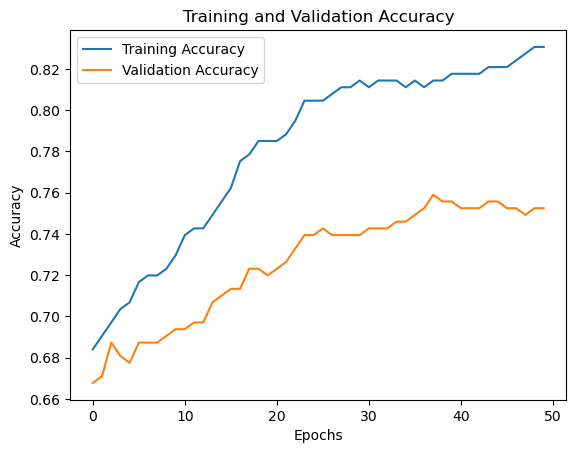

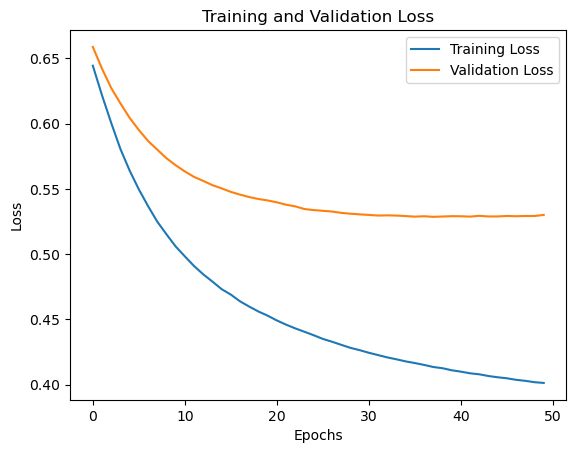

In [11]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_acc:.4f}")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(HiddenLayer.history['accuracy'], label='Training Accuracy')
plt.plot(HiddenLayer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(HiddenLayer.history['loss'], label='Training Loss')
plt.plot(HiddenLayer.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
val_acc_single_layer = max(SingleLayer.history['val_accuracy'])
val_acc_hidden_layer = max(HiddenLayer.history['val_accuracy'])

if val_acc_single_layer > val_acc_hidden_layer:
    best_model = 'Single-Layer Perceptron Model'
    best_val_acc = val_acc_single_layer
else:
    best_model = 'Hidden-Layer Perceptron Model'
    best_val_acc = val_acc_hidden_layer

print(f"The best model is: {best_model}")
print(f"Best validation accuracy: {best_val_acc:.4f}")

The best model is: Hidden-Layer Perceptron Model
Best validation accuracy: 0.7590


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

def build_model(neurons, learning_rate):
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')  
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'neurons': [16, 32],             
    'batch_size': [16, 32],          
    'epochs': [20],                  
    'learning_rate': [0.001, 0.0001] 
}

hyperparam_combinations = list(product(param_grid['neurons'], param_grid['batch_size'], 
                                       param_grid['epochs'], param_grid['learning_rate']))

best_val_acc = 0.0
best_params = None
best_history = None
best_model = None

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

for combo in hyperparam_combinations:
    neurons, batch_size, epochs, learning_rate = combo
    print(f"\nTraining model with {neurons} neurons, batch size {batch_size}, learning rate {learning_rate}")
    print("-"*70)
    
    model = build_model(neurons, learning_rate)
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        epochs=epochs, batch_size=batch_size, verbose=0, 
                        callbacks=[early_stopping]) 
    
    final_val_acc = history.history['val_accuracy'][-1]
    
    if final_val_acc > best_val_acc:
        best_val_acc = final_val_acc
        best_params = combo
        best_history = history
        best_model = model

    print(f"Final Validation Accuracy for this combination: {final_val_acc:.4f}")
    print("-"*70)

neurons, batch_size, epochs, learning_rate = best_params
print(f"Best hyperparameters - Neurons: {neurons}, Batch Size: {batch_size}, Learning Rate: {learning_rate}, Epochs: {epochs}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Training model with 16 neurons, batch size 16, learning rate 0.001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.7329
----------------------------------------------------------------------

Training model with 16 neurons, batch size 16, learning rate 0.0001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.6775
----------------------------------------------------------------------

Training model with 16 neurons, batch size 32, learning rate 0.001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.7199
----------------------------------------------------------------------

Training model with 16 neurons, batch size 32, learning rate 0.0001
----------------------------------------------------------------------
Final Validation Accuracy for this combination: 0.6352
---------

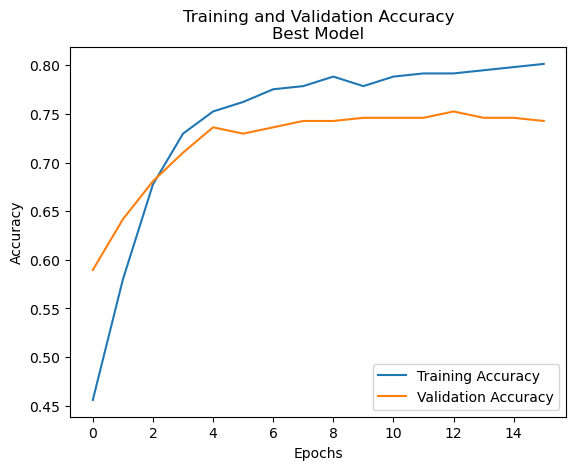

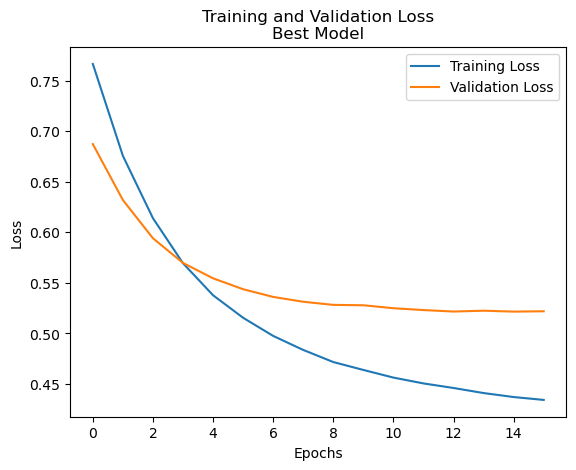

In [14]:
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Training and Validation Accuracy\nBest Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title(f'Training and Validation Loss\nBest Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 209us/step


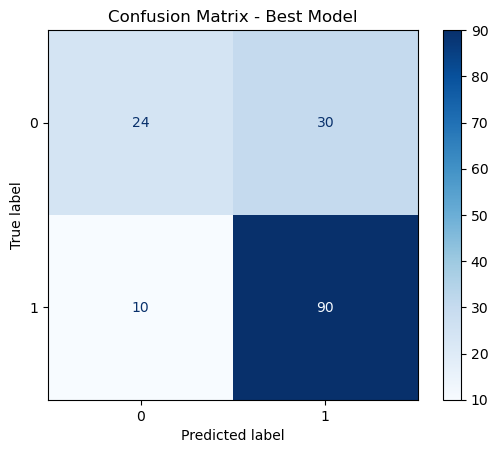

In [15]:
y_test_pred = (best_model.predict(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Model')
plt.show()

Testing Best Model against Other Traditional ML Models (LR, RF, SVM)

Logistic Regression Accuracy: 0.7727
Random Forest Accuracy: 0.7792
SVM Accuracy: 0.7857


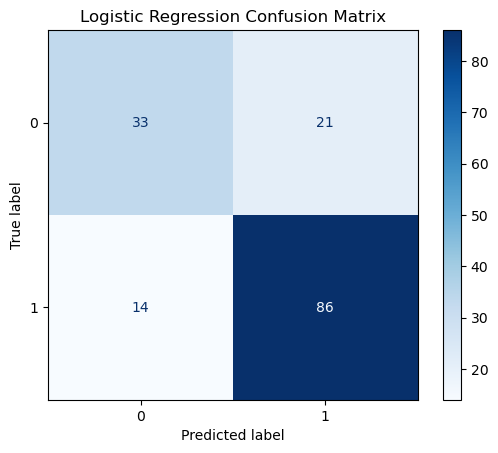

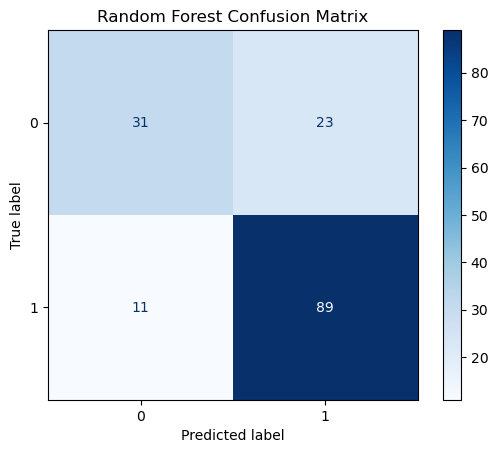

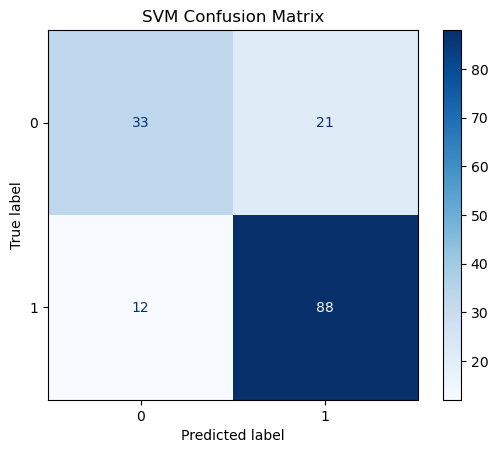

In [16]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic)

y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy: {acc_logistic:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, "Logistic Regression Confusion Matrix")

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")

The Workflow of the project was refered from various sources as listed below

[1] I acknowledge the use of ChatGPT [https://chat.openai.com/] and ChatGPT Custom Model to generate ideas and material for background research and project planning in the drafting of this assignment. The following prompts were entered into ChatGPT on 26th September 2024:

    1. Perceptron Diabetes Detection Code Workflow Overview
    2. Plot Interpretation

[2] https://www.kaggle.com/code/diljotsinghsaini/predicting-diabetes

[3] https://www.kaggle.com/code/psugunnasil/961701-simple-ann-classification

[4] https://www.kaggle.com/code/mohammedezzeldean/diabetes-prediction-ann